In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 데이터에서 독립 변수(Outcome 제외)를 추출
X = df.drop('Outcome', axis=1)

X_scaled = StandardScaler().fit_transform(X)

In [22]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# 축소된 데이터 복원 (원래 차원으로 복원)
X_reconstructed = pca.inverse_transform(X_pca)

# 원본 데이터와 복원된 데이터 비교 (MSE 계산)
mse = mean_squared_error(X_scaled, X_reconstructed)
print(mse)

0.18836332694351426


In [24]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [26]:
# 결측치 확인

print(df.shape)
print(df.isnull().values.any())

(284807, 31)
False


In [27]:
data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [28]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(227451, 29)

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 20  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 20)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 29)             │           319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 3. 모델 학습
history = autoencoder.fit(X_train, X_train, 
                          epochs=30, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 3s 390us/step - loss: 0.9042 - val_loss: 0.8186
Epoch 2/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step - loss: 0.8456 - val_loss: 0.8021
Epoch 3/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 367us/step - loss: 0.8143 - val_loss: 0.7955
Epoch 4/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 369us/step - loss: 0.7994 - val_loss: 0.7940
Epoch 5/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 366us/step - loss: 0.8169 - val_loss: 0.7920
Epoch 6/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step - loss: 0.7947 - val_loss: 0.7855
Epoch 7/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step - loss: 0.7940 - val_loss: 0.7842
Epoch 8/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step - loss: 0.8016 - val_loss: 0.7834
Epoch 9/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 367us/step - loss: 0.8001 - val_loss: 0.7829
Epoch 10/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 368us/step - loss: 0.7983 - val_loss: 0.7907
Epoch 11/30
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step - loss: 0.7898 - val_loss: 0.7826
Epoch 12

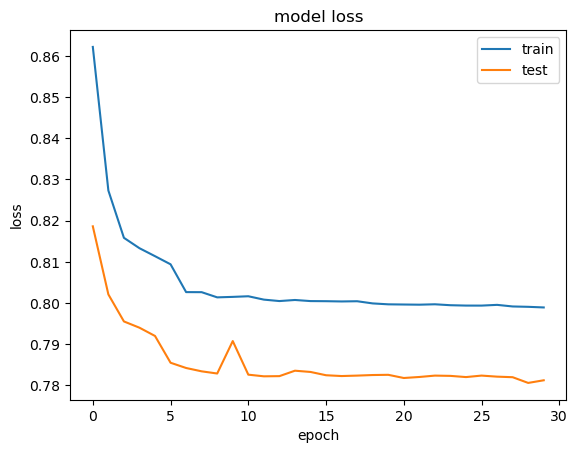

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [53]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [54]:
df['activity'].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

In [61]:
df_filtered = df[df['activity'].isin(['sitting', 'jumping'])]
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping,p8
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping,p8
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping,p8
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping,p8


In [63]:
for i in df_filtered.columns:
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    df_filtered[i] = LabelEncoder().fit_transform(df_filtered[i])
df_filtered

C:\Users\1563a\AppData\Local\Temp\ipykernel_41604\632236701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[i] = LabelEncoder().fit_transform(df_filtered[i])


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,222,165,539,465,465,219,900,483,825,360,...,199,554,228,192,220,248,248,428,1,0
1,227,170,581,444,444,517,901,490,827,138,...,256,96,224,193,211,266,266,706,1,0
2,218,145,580,359,359,268,902,489,830,63,...,170,177,231,200,228,217,217,439,1,0
3,211,148,544,387,387,138,905,514,828,358,...,135,369,259,228,253,309,309,600,1,0
4,207,158,578,271,271,955,908,502,835,109,...,226,167,268,231,260,250,250,619,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,659,554,258,771,771,531,23,582,61,874,...,622,690,798,776,727,681,681,638,0,7
8636,305,587,218,783,783,657,91,486,95,875,...,635,736,791,786,723,706,706,761,0,7
8637,714,598,309,757,757,524,95,419,189,754,...,617,810,831,772,758,663,663,693,0,7
8638,530,555,213,775,775,554,101,516,127,812,...,525,668,784,769,738,749,749,634,0,7


In [88]:
X=df_filtered.drop('activity',axis=1)
y=df_filtered['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.shape)
print(y.shape)

(960, 271)
(960,)


In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

encoding_dim = 30  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(1)(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 30)             │         8,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,881 (34.69 KB)

 Trainable params: 8,881 (34.69 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# 3. 모델 학습
history2 = autoencoder.fit(X_train, y_train, 
                          epochs=30, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 8778.2402 - val_loss: 126.0447
Epoch 2/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 118.9022 - val_loss: 43.0248
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 41.7912 - val_loss: 21.5209
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 19.4410 - val_loss: 11.5710
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 10.0302 - val_loss: 7.2222
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 6.9444 - val_loss: 6.4146
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 5.1011 - val_loss: 4.0353
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 3.3479 - val_loss: 3.2113
Epoch 9/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 2.7534 - val_loss: 1.9966
Epoch 10/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 2.1612 - val_loss: 1.5805
Epoch 11/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.6763 - val_loss: 1.2705
Epoch 12/30
162/1

In [93]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,reconstruction_error,true_class
count,240.000000,240.000000
mean,287489.689806,0.508333
std,89766.723042,0.500975
min,166874.373608,0.000000
25%,204333.004095,0.000000
50%,262899.057600,1.000000
75%,363690.970672,1.000000
max,485954.107421,1.000000


In [96]:
valid=df_filtered[df_filtered['activity'].isin([1])]
valid

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,222,165,539,465,465,219,900,483,825,360,...,199,554,228,192,220,248,248,428,1,0
1,227,170,581,444,444,517,901,490,827,138,...,256,96,224,193,211,266,266,706,1,0
2,218,145,580,359,359,268,902,489,830,63,...,170,177,231,200,228,217,217,439,1,0
3,211,148,544,387,387,138,905,514,828,358,...,135,369,259,228,253,309,309,600,1,0
4,207,158,578,271,271,955,908,502,835,109,...,226,167,268,231,260,250,250,619,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,145,86,531,77,77,220,641,289,719,260,...,472,663,481,431,473,479,479,742,1,7
476,147,81,541,78,78,225,625,294,731,227,...,437,104,478,413,416,432,432,49,1,7
477,140,87,527,33,33,227,593,242,704,83,...,429,793,476,420,445,442,442,365,1,7
478,138,77,537,46,46,447,614,274,720,175,...,418,11,475,425,443,436,436,746,1,7


In [100]:
X=valid.drop('activity',axis=1)
y=valid['activity']
t_train, v_train, t_test, v_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [101]:
history2 = autoencoder.fit(v_train, v_test, 
                          epochs=30, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 - val_loss: 0.0808
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0708 - val_loss: 0.0729
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0730 - val_loss: 0.0462
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0450 - val_loss: 0.0452
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0669 - val_loss: 0.0507
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0300 - val_loss: 0.0502
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0355 - val_loss: 0.0281
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0286 - val_loss: 0.0156
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0219 - val_loss: 0.0144
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 - val_loss: 0.0181
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0177 - val_loss: 0.0190
Epoch 12/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - los

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = autoencoder.predict(v_train)
mse = np.mean(np.power(v_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': v_test})

threshold = 15
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
print(classification_report(error_df.true_class, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

